In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sb
from sklearn import preprocessing

In [ ]:

import os
import csv
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV,LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectFromModel,RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc,f1_score,accuracy_score,\
classification_report,multilabel_confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,LabelBinarizer
from scipy import interp
from itertools import cycle

In [ ]:
#loading the data to a Pandas DataFrame
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',names=["age","sex","cp","trestbps", "chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","output"])
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
#checking if data set contains null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
output      0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'output'],
      dtype='object')

In [ ]:
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
#Confusion matrix representation

f1_score_models = {}
auc_score_models = {}
acc_score_models = {}

def plot_roc_cm(model_name,cm,n_classes, fpr, tpr, roc_auc,class_report_df,average = "macro"):

  fig,ax = plt.subplots(1,2,figsize=(25,6))
  labels = ['0','1','2','3','4','avg/total']
  sns.heatmap(cm,ax=ax[0],annot=True)
  ax[0].set_title(f"Confusion Matrix for {model_name}")
  ax[0].set_xticklabels(labels[:-1], rotation=45, ha='left',weight='bold',fontsize = 14)
  ax[0].set_yticklabels(labels[:-1], rotation=45, ha='right',weight='bold',fontsize = 14)
  
  sns.heatmap(class_report_df.iloc[:,:].drop(['support','pred'],axis=1),annot=True,ax=ax[1])
  
  ax[1].set_title(f'Classificaton report for {model_name}')
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='left',weight='bold',fontsize = 12)
  ax[1].set_yticklabels(labels, rotation=45, ha='right',weight='bold',fontsize = 14)
 
  

def class_report(model_name,y_true, y_pred, y_score=None, average='macro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return
    cm = confusion_matrix(y_true, y_pred)
    
    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr
            
            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        ac_score = (cm.diagonal()/cm.sum(axis=1)).tolist()
        
        class_report_df['Accuracy'] = pd.Series(ac_score)
        class_report_df.loc['avg / total','Accuracy'] = accuracy_score(y_true,y_pred)
        # np.append(ac_score,accuracy_score(y_true,y_pred))
        # class_report_df['Accuracy']  = pd.Series(ac_score)
        # class_report_df['AUC'] = pd.Series(roc_auc)
        
    
    # for score in ac_score:
    #   print(score)

    # print(accuracy_score(y_true,y_pred))
    plot_roc_cm(model_name,cm,n_classes,fpr,tpr,roc_auc,class_report_df,average)
    return class_report_df



In [ ]:
#replacing all ? values to NaN
df =df.replace('?',np.nan)

In [ ]:
for column in df:
  df[column] = df[column].astype(float)

In [ ]:
#replacing output to only 0 and 1
#results = [1,2,3,4]
#df['output'] = np.where(df['output'].isin(results), '1', '0')
#display(df)

In [ ]:
#replacing all NaN values to mean value of the column
for column in df:
  df[column] = df[column].replace(np.nan,df[column].mean(skipna=True))

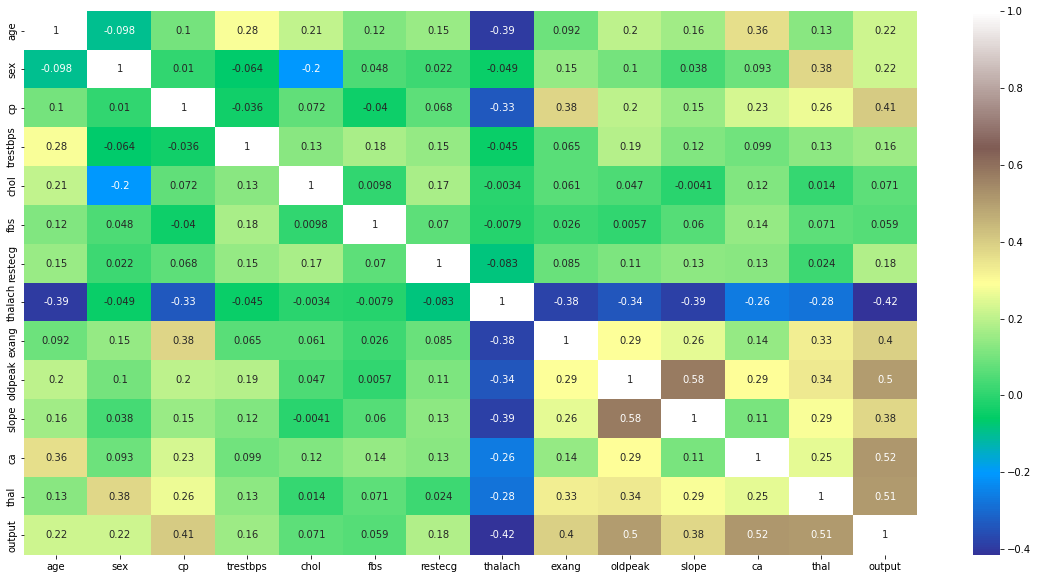

In [ ]:
#import matplolib to see the correlation among the attributes
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sb.heatmap(df.corr(), annot=True, cmap='terrain')

In [ ]:
#splitting data set into features, and expected output
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
#splitting data set with 75% of training data, and 25% of testing data, including random split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=2)

**Data scaling**

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Random Forest Classifier**

In [ ]:
#First trying RandomTreeClassification 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
modelTree = forest
modelTree.score(X_train,Y_train)

0.973568281938326

In [ ]:
from sklearn.metrics import accuracy_score
predictionTree = modelTree.predict(X_test)
rfScore = accuracy_score(Y_test,predictionTree)
print(rfScore)


0.5789473684210527


              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        44
         1.0       0.10      0.06      0.08        16
         2.0       0.00      0.00      0.00         6
         3.0       0.50      0.25      0.33         8
         4.0       0.00      0.00      0.00         2

    accuracy                           0.58        76
   macro avg       0.27      0.25      0.25        76
weighted avg       0.51      0.58      0.54        76



<ipython-input-348-e1ac62622a14>:103: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


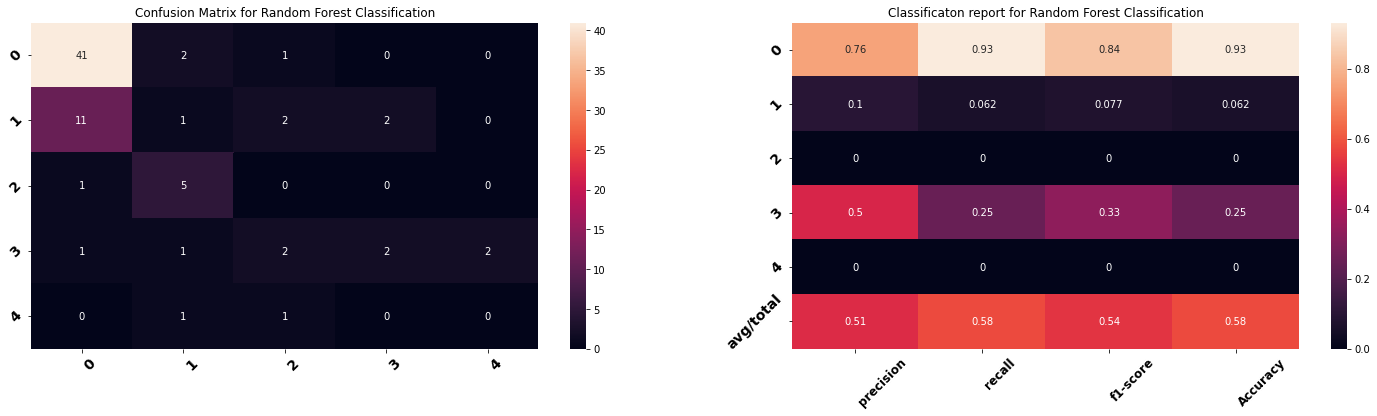

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionTree))
report_with_auc = class_report(
    model_name = 'Random Forest Classification',
    y_true=Y_test, 
    y_pred=modelTree.predict(X_test), 
    y_score=modelTree.predict_proba(X_test),
    average='macro')
acc_score_models['Random Forest Classification'] = report_with_auc.loc['avg / total','Accuracy']


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
modelLR = lr
modelLR.score(X_train,Y_train)

0.6475770925110133

In [ ]:
from sklearn.metrics import accuracy_score
predictionLR = modelLR.predict(X_test)
lrScore = accuracy_score(Y_test,predictionLR)
print(lrScore)

0.618421052631579


              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        44
         1.0       0.22      0.12      0.16        16
         2.0       0.17      0.17      0.17         6
         3.0       0.44      0.50      0.47         8
         4.0       0.00      0.00      0.00         2

    accuracy                           0.62        76
   macro avg       0.33      0.34      0.33        76
weighted avg       0.58      0.62      0.59        76



<ipython-input-348-e1ac62622a14>:103: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


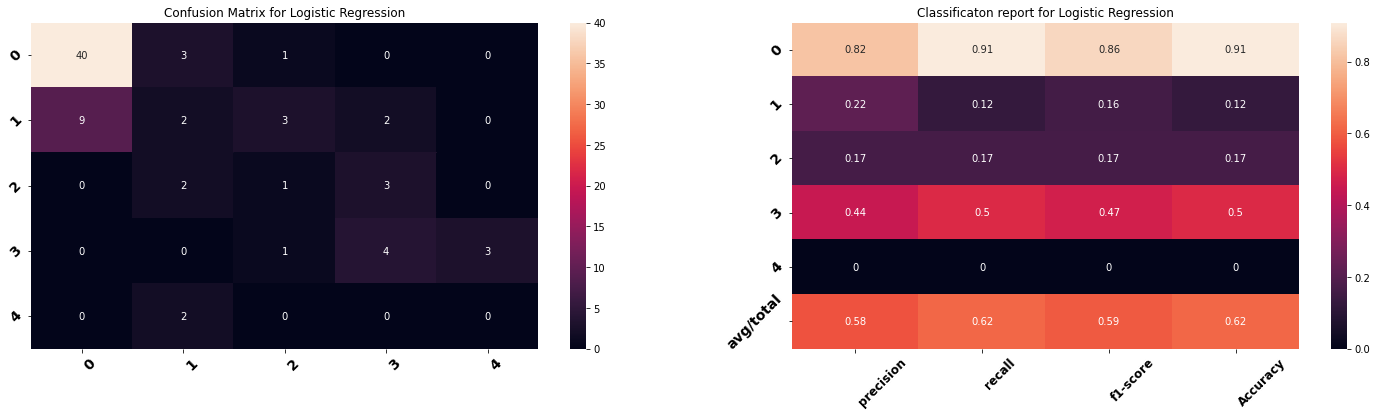

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionLR))
report_with_auc = class_report(
    model_name = 'Logistic Regression',
    y_true=Y_test, 
    y_pred=modelLR.predict(X_test), 
    y_score=modelLR.predict_proba(X_test),
    average='macro')
acc_score_models['Logistic Regression'] = report_with_auc.loc['avg / total','Accuracy']

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)


DecisionTreeClassifier()

In [ ]:
modelDTC = dtc
modelDTC.score(X_train,Y_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
predictionDTC = modelDTC.predict(X_test)
dtScore = accuracy_score(Y_test,predictionDTC)
print(dtScore)

0.5


              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76        44
         1.0       0.14      0.12      0.13        16
         2.0       0.18      0.33      0.24         6
         3.0       0.31      0.50      0.38         8
         4.0       0.00      0.00      0.00         2

    accuracy                           0.50        76
   macro avg       0.30      0.33      0.30        76
weighted avg       0.57      0.50      0.53        76



<ipython-input-12-e1ac62622a14>:103: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


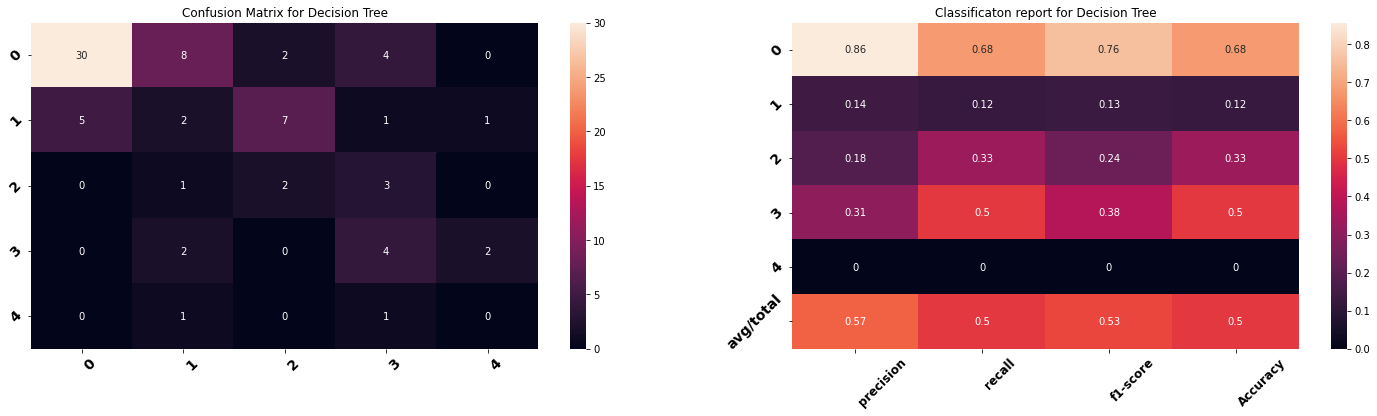

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionDTC))
report_with_auc = class_report(
    model_name = 'Decision Tree',
    y_true=Y_test, 
    y_pred=modelDTC.predict(X_test), 
    y_score=modelDTC.predict_proba(X_test),
    average='macro')
acc_score_models['Decision Tree'] = report_with_auc.loc['avg / total','Accuracy']

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
modelKNN = KNN
modelKNN.score(X_train,Y_train)

0.6651982378854625

In [ ]:
from sklearn.metrics import accuracy_score
predictionKNN = modelKNN.predict(X_test)
knnScore = accuracy_score(Y_test,predictionKNN)
print(knnScore)

NameError: ignored

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91        44
         1.0       0.47      0.44      0.45        16
         2.0       0.00      0.00      0.00         6
         3.0       0.40      0.25      0.31         8
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        76
   macro avg       0.34      0.33      0.33        76
weighted avg       0.63      0.68      0.65        76



<ipython-input-348-e1ac62622a14>:103: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


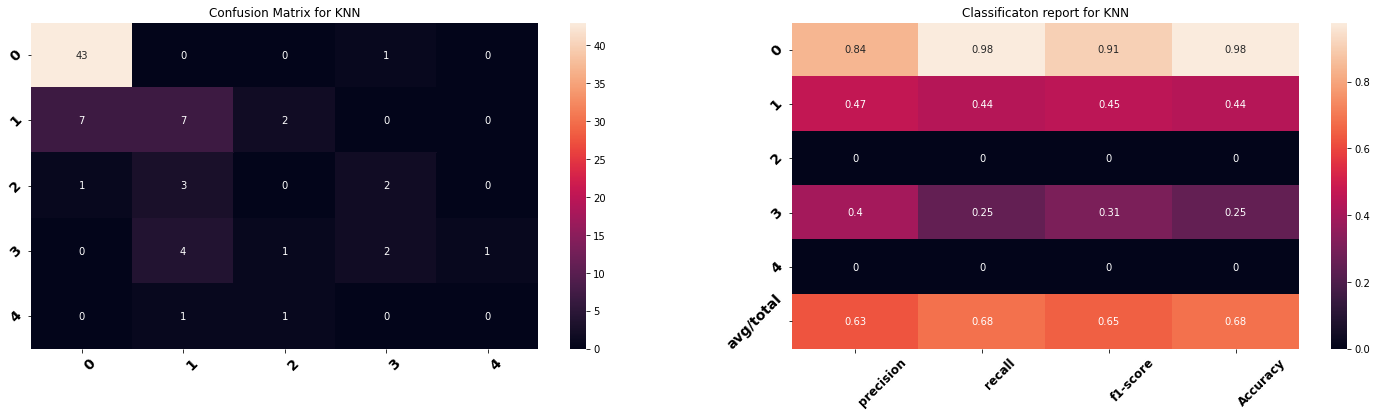

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionKNN))
report_with_auc = class_report(
    model_name = 'KNN',
    y_true=Y_test, 
    y_pred=modelKNN.predict(X_test), 
    y_score=modelKNN.predict_proba(X_test),
    average='macro')
acc_score_models['KNN'] = report_with_auc.loc['avg / total','Accuracy']

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
knn_range = 12
for k in range(1,knn_range):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,X_train,Y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

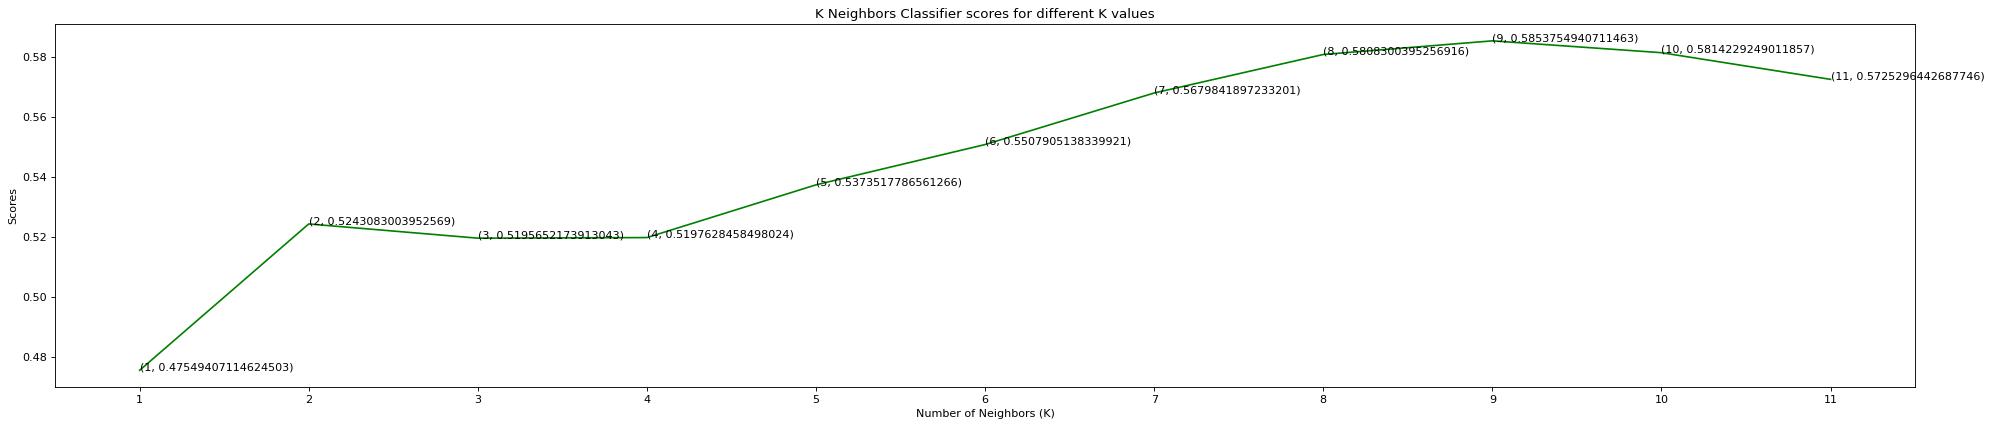

In [ ]:
plt.figure(figsize=(30, 6), dpi=80)
plt.plot([k for k in range(1, knn_range)], knn_scores, color = 'green')
for i in range(1,knn_range):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, knn_range)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

# **SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train,Y_train)

SVC(probability=True)

In [ ]:
modelSVM = svm
modelSVM.score(X_train,Y_train)
print(svmScore)

0.7665198237885462


In [ ]:
from sklearn.metrics import accuracy_score
predictionSVM = modelSVM.predict(X_test)
svmScore = accuracy_score(Y_test,predictionSVM)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89        44
         1.0       0.44      0.25      0.32        16
         2.0       0.27      0.50      0.35         6
         3.0       0.33      0.12      0.18         8
         4.0       0.00      0.00      0.00         2

    accuracy                           0.67        76
   macro avg       0.37      0.37      0.35        76
weighted avg       0.62      0.67      0.63        76



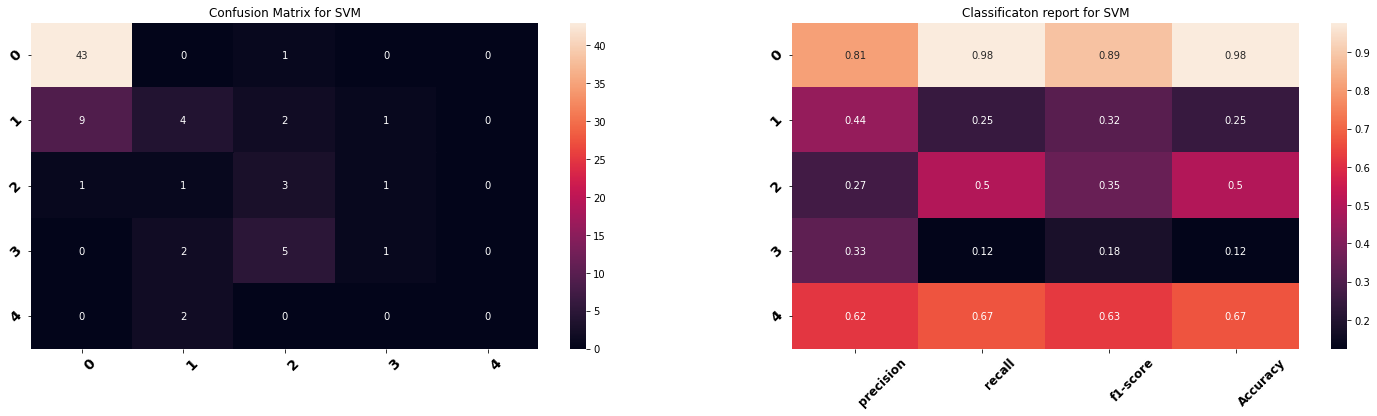

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionSVM))
report_with_auc = class_report(
    model_name = 'SVM',
    y_true=Y_test, 
    y_pred=modelSVM.predict(X_test), 
    y_score=modelSVM.predict_proba(X_test),
    average='macro')
acc_score_models['SVM'] = report_with_auc.loc['avg / total','Accuracy']

# **MULTILAYER PERCEPTRON**

In [ ]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier()
NN.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
modelNN = NN
modelNN.score(X_train,Y_train)

0.7973568281938326

In [ ]:
from sklearn.metrics import accuracy_score
predictionNN = modelNN.predict(X_test)
nnScore = accuracy_score(Y_test,predictionNN)
print(nnScore)

0.6052631578947368


              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        44
         1.0       0.27      0.19      0.22        16
         2.0       0.12      0.17      0.14         6
         3.0       0.38      0.38      0.38         8
         4.0       0.00      0.00      0.00         2

    accuracy                           0.61        76
   macro avg       0.32      0.32      0.32        76
weighted avg       0.58      0.61      0.59        76



<ipython-input-348-e1ac62622a14>:103: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


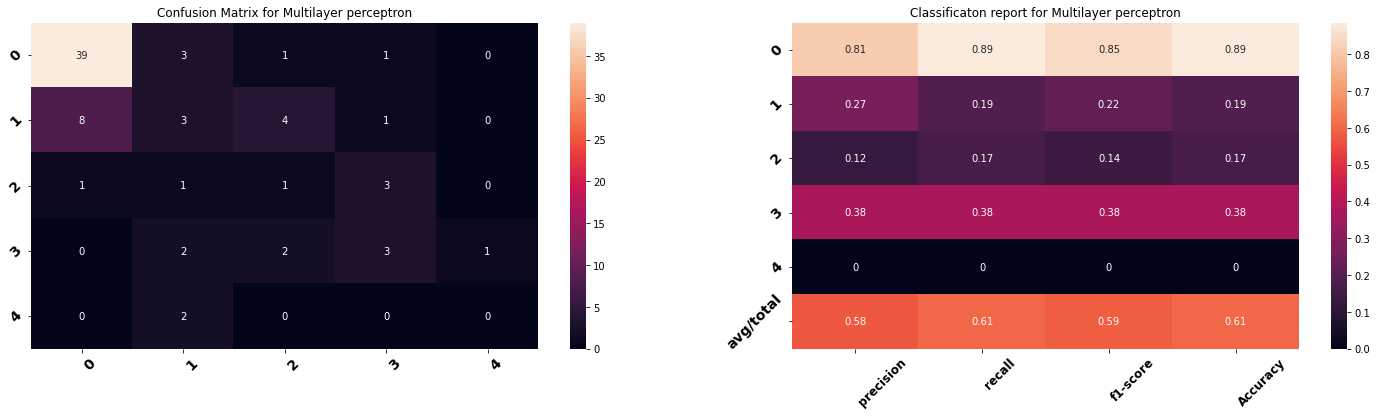

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionNN))
report_with_auc = class_report(
    model_name = 'Multilayer perceptron',
    y_true=Y_test, 
    y_pred=modelNN.predict(X_test), 
    y_score=modelNN.predict_proba(X_test),
    average='macro')
acc_score_models['Multilayer perceptron'] = report_with_auc.loc['avg / total','Accuracy']

 **Models comparision**


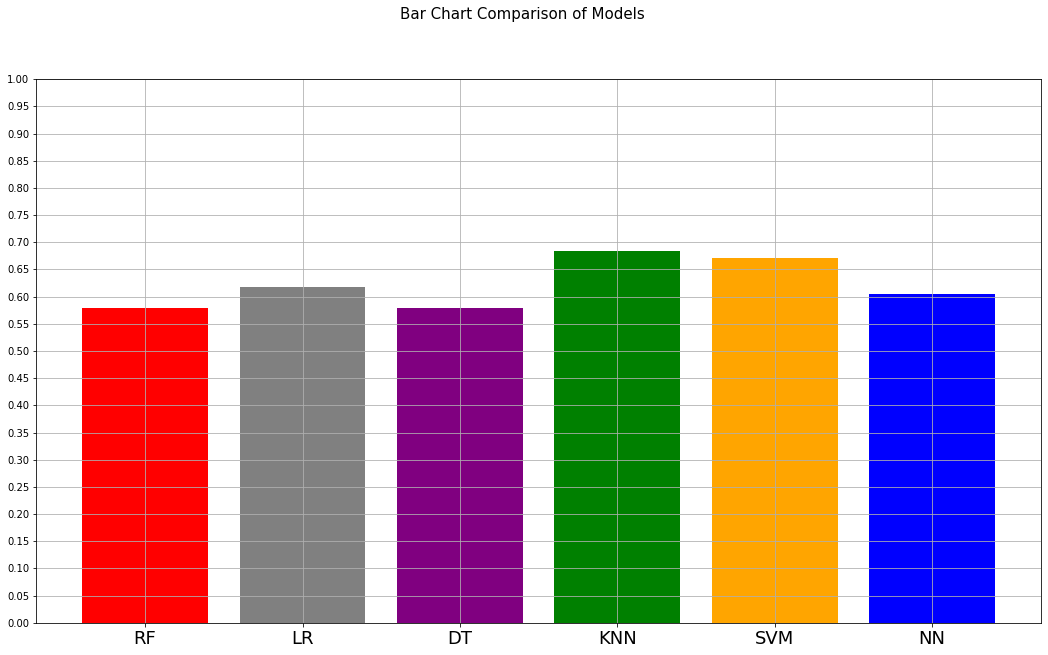

In [ ]:
algorithms=("RF","LR","DT","KNN","SVM","NN")
scores = (rfScore,lrScore,dtScore,knnScore,svmScore,nnScore)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

**Building a Predictive System**

In [ ]:
input_data = (57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = modelNN.predict(input_data_reshaped)

def switch(prediction):
    if prediction == 0:
        return "No heart disease"
    elif prediction == 1:
        return "Heart disease at presence level 1"
    elif prediction == 2:
        return "Heart disease at presence level 2"
    elif prediction == 3:
        return "Heart disease at presence level 3"
    elif prediction == 4:
        return "Heart disease at presence level 4"

print(switch(prediction))   

No heart disease
